In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df_EarthQuake = pd.read_csv('Merged_EarthQuake_data.csv')
df_EarthQuake

,date,latitude,longitude,depth,magnitude,nst,gap,dmin,place
0,1984-01-01T00:46:34.450Z,-37.4310,77.6270,10.00,5.2,NaN,NaN,NaN,Mid-Indian Ridge
1,1984-01-01T01:55:01.370Z,-2.6010,141.5970,33.00,5.5,NaN,NaN,NaN,"34 km ENE of Vanimo, Papua New Guinea"
2,1984-01-01T02:22:43.630Z,41.8230,142.1370,75.00,5.1,NaN,NaN,NaN,"59 km SSW of Shizunai-furukawach?, Japan"
3,1984-01-01T06:00:23.640Z,0.9500,126.0680,65.10,5.0,NaN,NaN,NaN,Molucca Sea
4,1984-01-01T09:03:38.850Z,33.6830,136.8940,368.10,7.2,NaN,NaN,NaN,"77 km ESE of Owase, Japan"
...,...,...,...,...,...,...,...,...,...
105127,2019-12-31T18:37:24+0000,50.4878,-121.0354,14.00,1.8,NaN,NaN,NaN,"31 km SE of Ashcroft, BC"
105128,2019-12-31T22:18:53+0000,48.2504,-78.4490,0.00,2.4,NaN,NaN,NaN,"Blast, Laronde Mine, QC"
105129,2019-12-31T23:11:07+0000,50.5262,-121.0061,10.45,2.0,NaN,NaN,NaN,"29 km SE of Ashcroft, BC"
105130,2019-12-31T23:53:23+0000,45.0834,-74.7183,18.00,1.9,NaN,NaN,NaN,"6 km N from Cornwall, ON"


In [3]:
df_EarthQuake.shape

(105132, 9)

In [4]:
df_EarthQuake.describe()

,latitude,longitude,depth,magnitude,nst,gap,dmin
count,105132.000000,105132.000000,105132.000000,105132.000000,23.000000,23.000000,19.000000
mean,51.585285,-111.319618,16.438363,2.166291,44.652174,174.086957,0.289672
std,11.667763,44.387924,31.359220,1.065114,35.954022,91.876836,0.296246
min,-68.538000,-179.988000,-2.600000,-1.900000,0.000000,26.000000,0.010810
25%,48.738600,-132.327000,6.200000,1.400000,28.000000,82.150000,0.079280
50%,50.814400,-127.780600,12.600000,2.100000,35.000000,193.000000,0.182900
75%,55.482800,-94.835300,19.900000,2.800000,54.500000,266.000000,0.423900
max,86.807000,179.966000,693.800000,7.700000,150.000000,296.000000,0.997300


In [5]:
df_EarthQuake.columns

Index(['date', 'latitude', 'longitude', 'depth', 'magnitude', 'nst', 'gap',
       'dmin', 'place'],
      dtype='object')

In [6]:
df_EarthQuake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105132 entries, 0 to 105131
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   date       105132 non-null  object 
 1   latitude   105132 non-null  float64
 2   longitude  105132 non-null  float64
 3   depth      105132 non-null  float64
 4   magnitude  105132 non-null  float64
 5   nst        23 non-null      float64
 6   gap        23 non-null      float64
 7   dmin       19 non-null      float64
 8   place      105132 non-null  object 
dtypes: float64(7), object(2)
memory usage: 7.2+ MB


### **map**

In [7]:
!pip install cartopy
!conda install -c conda-forge cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 26.9 MB/s eta 0:00:00
/bin/bash: line 1: conda: command not found


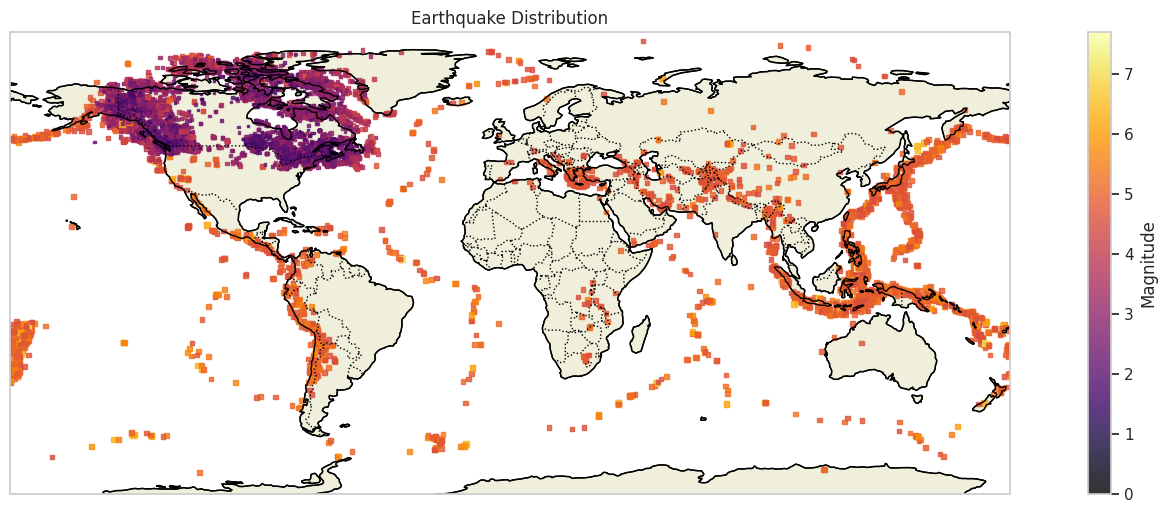

In [31]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 6), subplot_kw=dict(projection=ccrs.PlateCarree()))

# วาด marker บนแผนที่ โดยกำหนดสีตามค่า magnitude
plt.scatter(df_EarthQuake['longitude'], df_EarthQuake['latitude'],
            s=df_EarthQuake['magnitude']**1.5,
            c=df_EarthQuake['magnitude'],
            cmap='inferno',  # เปลี่ยนเป็น colormap 'inferno'
            alpha=0.8,  # เพิ่มค่า alpha เพื่อให้สีเข้มขึ้น
            marker='s',
            transform=ccrs.PlateCarree())

# เพิ่มรายละเอียดแผนที่
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')

# เพิ่มแถบสีเกลียว
plt.colorbar(label='Magnitude')

# แสดงแผนที่
plt.title('Earthquake Distribution')
plt.show()

<ipython-input-9-e904247d36bc>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_EarthQuake.corr(), annot=True, cmap='coolwarm', fmt=".2f")


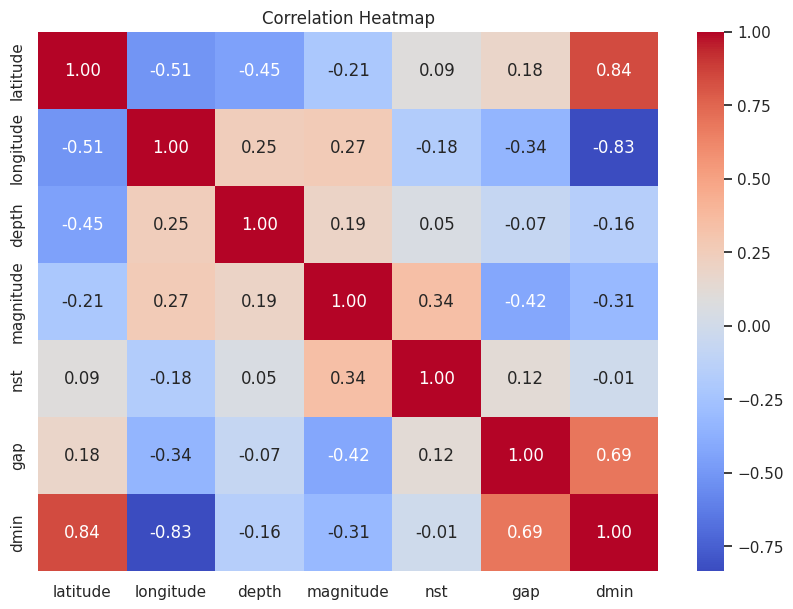

In [9]:
# สร้าง heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(df_EarthQuake.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

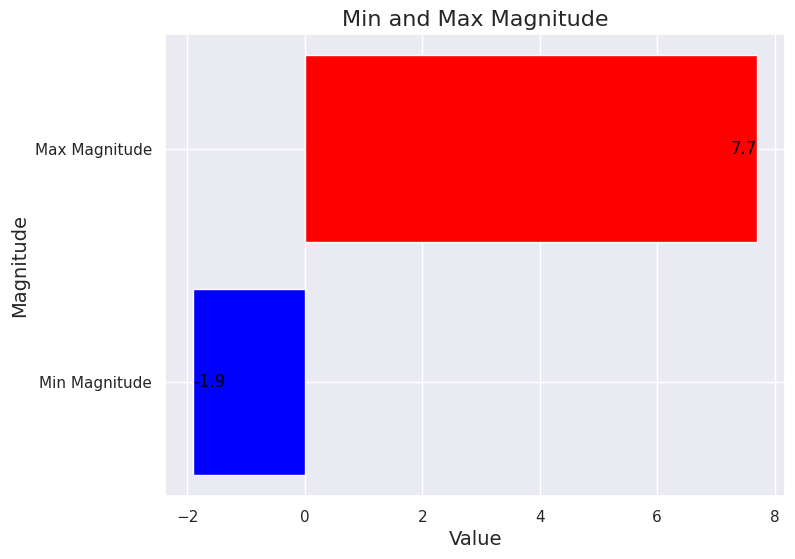

In [10]:
max_magnitude = df_EarthQuake['magnitude'].max()
min_magnitude = df_EarthQuake['magnitude'].min()

# สร้างแผนภูมิแท่งแนวนอน
plt.figure(figsize=(8, 6))

# กำหนดค่าของแผนภูมิแท่งแนวนอน
bar_values = [min_magnitude, max_magnitude]
bar_labels = ['Min Magnitude', 'Max Magnitude']
bar_colors = ['blue', 'red']

# สร้างแผนภูมิแท่งแนวนอน
plt.barh(bar_labels, bar_values, color=bar_colors)

# เพิ่มข้อความบนแท่ง
plt.text(min_magnitude, 0, f'{min_magnitude}', ha='left', va='center', color='black', fontsize=12)
plt.text(max_magnitude, 1, f'{max_magnitude}', ha='right', va='center', color='black', fontsize=12)

# ตั้งชื่อแกน x และ y และชื่อกราฟ
plt.xlabel('Value', fontsize=14)
plt.ylabel('Magnitude', fontsize=14)
plt.title('Min and Max Magnitude', fontsize=16)

# แสดงกราฟ
plt.show()

### **duplicated**

In [11]:
df_EarthQuake.drop_duplicates(keep=False, inplace=True)
print('duplicated: %s'%(df_EarthQuake.duplicated(keep=False).sum()))

duplicated: 0


In [12]:
df_EarthQuake

,date,latitude,longitude,depth,magnitude,nst,gap,dmin,place
0,1984-01-01T00:46:34.450Z,-37.4310,77.6270,10.00,5.2,NaN,NaN,NaN,Mid-Indian Ridge
1,1984-01-01T01:55:01.370Z,-2.6010,141.5970,33.00,5.5,NaN,NaN,NaN,"34 km ENE of Vanimo, Papua New Guinea"
2,1984-01-01T02:22:43.630Z,41.8230,142.1370,75.00,5.1,NaN,NaN,NaN,"59 km SSW of Shizunai-furukawach?, Japan"
3,1984-01-01T06:00:23.640Z,0.9500,126.0680,65.10,5.0,NaN,NaN,NaN,Molucca Sea
4,1984-01-01T09:03:38.850Z,33.6830,136.8940,368.10,7.2,NaN,NaN,NaN,"77 km ESE of Owase, Japan"
...,...,...,...,...,...,...,...,...,...
105127,2019-12-31T18:37:24+0000,50.4878,-121.0354,14.00,1.8,NaN,NaN,NaN,"31 km SE of Ashcroft, BC"
105128,2019-12-31T22:18:53+0000,48.2504,-78.4490,0.00,2.4,NaN,NaN,NaN,"Blast, Laronde Mine, QC"
105129,2019-12-31T23:11:07+0000,50.5262,-121.0061,10.45,2.0,NaN,NaN,NaN,"29 km SE of Ashcroft, BC"
105130,2019-12-31T23:53:23+0000,45.0834,-74.7183,18.00,1.9,NaN,NaN,NaN,"6 km N from Cornwall, ON"


### **Missing Values**

In [13]:
df_EarthQuake.isnull().any()

date         False
latitude     False
longitude    False
depth        False
magnitude    False
nst           True
gap           True
dmin          True
place        False
dtype: bool

In [14]:
columns_to_drop = ['date', 'latitude', 'longitude', 'depth', 'magnitude', 'place']
means = df_EarthQuake.drop(columns=columns_to_drop).mean()
df_EarthQuake.fillna(value=means, inplace=True)
means

nst      44.652174
gap     174.086957
dmin      0.289672
dtype: float64

In [15]:
df_EarthQuake['place'].fillna(('Unknown'), inplace=True)

In [16]:
df_EarthQuake.isnull().any()

date         False
latitude     False
longitude    False
depth        False
magnitude    False
nst          False
gap          False
dmin         False
place        False
dtype: bool

In [17]:
df_EarthQuake

,date,latitude,longitude,depth,magnitude,nst,gap,dmin,place
0,1984-01-01T00:46:34.450Z,-37.4310,77.6270,10.00,5.2,44.652174,174.086957,0.289672,Mid-Indian Ridge
1,1984-01-01T01:55:01.370Z,-2.6010,141.5970,33.00,5.5,44.652174,174.086957,0.289672,"34 km ENE of Vanimo, Papua New Guinea"
2,1984-01-01T02:22:43.630Z,41.8230,142.1370,75.00,5.1,44.652174,174.086957,0.289672,"59 km SSW of Shizunai-furukawach?, Japan"
3,1984-01-01T06:00:23.640Z,0.9500,126.0680,65.10,5.0,44.652174,174.086957,0.289672,Molucca Sea
4,1984-01-01T09:03:38.850Z,33.6830,136.8940,368.10,7.2,44.652174,174.086957,0.289672,"77 km ESE of Owase, Japan"
...,...,...,...,...,...,...,...,...,...
105127,2019-12-31T18:37:24+0000,50.4878,-121.0354,14.00,1.8,44.652174,174.086957,0.289672,"31 km SE of Ashcroft, BC"
105128,2019-12-31T22:18:53+0000,48.2504,-78.4490,0.00,2.4,44.652174,174.086957,0.289672,"Blast, Laronde Mine, QC"
105129,2019-12-31T23:11:07+0000,50.5262,-121.0061,10.45,2.0,44.652174,174.086957,0.289672,"29 km SE of Ashcroft, BC"
105130,2019-12-31T23:53:23+0000,45.0834,-74.7183,18.00,1.9,44.652174,174.086957,0.289672,"6 km N from Cornwall, ON"


### **Outlier**

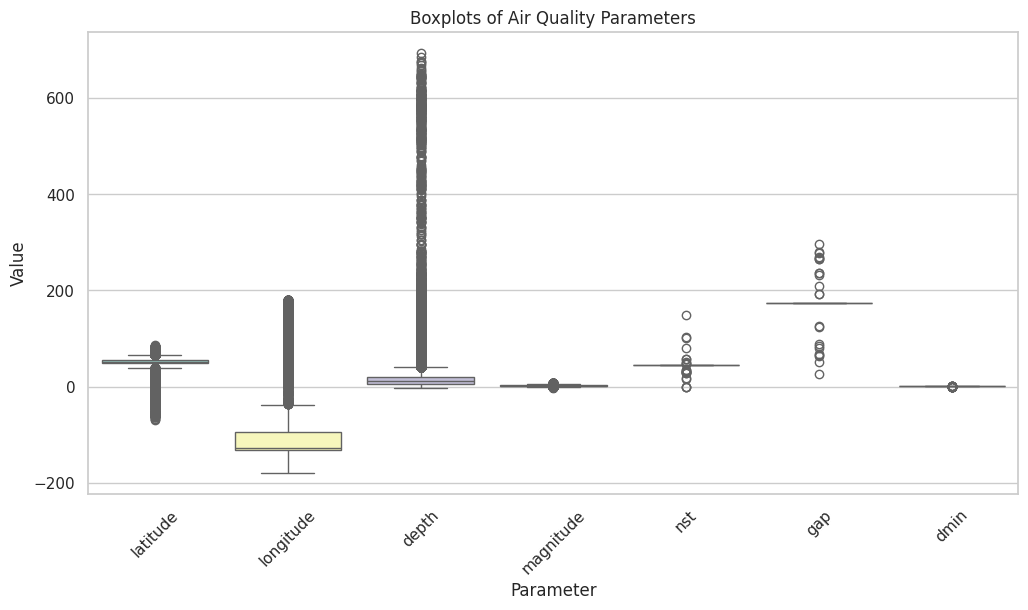

In [20]:
sns.set(style="whitegrid")

# Define the columns you want to create boxplots for
columns_to_plot = ['latitude', 'longitude', 'depth', 'magnitude', 'nst','gap', 'dmin']

# Create boxplots using Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_EarthQuake[columns_to_plot], orient="v", palette="Set3")
plt.title('Boxplots of Air Quality Parameters')
plt.ylabel('Value')
plt.xlabel('Parameter')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [19]:
df_EarthQuake.to_csv('EarthQuake_data_with_prep.csv', index=False)